In [0]:
pip install pycaret

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np

In [0]:
# reading the data
df=pd.read_csv('/content/gdrive/My Drive/FinalTable.csv')

In [11]:
df.head(5)

,_id,OCCUPANCY_DATE,Existing Shelters In Area,Max Temp (°C),Min Temp (°C),ORGANIZATION_NAME,SHELTER_NAME,SHELTER_ADDRESS,SHELTER_CITY,SHELTER_PROVINCE,SHELTER_POSTAL_CODE,FACILITY_NAME,PROGRAM_NAME,SECTOR,OCCUPANCY,CAPACITY
0,30,2019-01-01T00:00:00,4,0.5,-3.0,City of Toronto,Streets To Homes,129 Peter St,Toronto,ON,M5V 1X1,129 Peter St,Streets to Homes Bedded Program,Co-ed,32,40.0
1,134,2019-01-02T00:00:00,4,0.0,-11.0,City of Toronto,Streets To Homes,129 Peter St,Toronto,ON,M5V 1X1,129 Peter St,Streets to Homes Bedded Program,Co-ed,37,40.0
2,238,2019-01-03T00:00:00,4,2.0,-4.5,City of Toronto,Streets To Homes,129 Peter St,Toronto,ON,M5V 1X1,129 Peter St,Streets to Homes Bedded Program,Co-ed,34,40.0
3,342,2019-01-04T00:00:00,4,8.0,-0.5,City of Toronto,Streets To Homes,129 Peter St,Toronto,ON,M5V 1X1,129 Peter St,Streets to Homes Bedded Program,Co-ed,33,40.0
4,446,2019-01-05T00:00:00,4,4.0,-3.0,City of Toronto,Streets To Homes,129 Peter St,Toronto,ON,M5V 1X1,129 Peter St,Streets to Homes Bedded Program,Co-ed,33,40.0


# Convert date to YEAR,MONTH ,DAY

In [0]:
new_df=df.copy()
new_df['OCCUPANCY_DATE']=pd.to_datetime(new_df['OCCUPANCY_DATE'])
new_df['OCCUPANCY_DATE_year']= new_df['OCCUPANCY_DATE'].map(lambda x: x.strftime('%Y'))
new_df['OCCUPANCY_DATE_Month']=new_df['OCCUPANCY_DATE'].map(lambda x:x.strftime('%B'))
new_df['OCCUPANCY_DATE_Day']=new_df['OCCUPANCY_DATE'].map(lambda x:x.strftime('%A'))

# DROP unnecessarly attributes

In [0]:
new_df.drop(['_id','FACILITY_NAME','SHELTER_POSTAL_CODE','ORGANIZATION_NAME','SHELTER_ADDRESS','SHELTER_PROVINCE','SHELTER_NAME','OCCUPANCY_DATE','OCCUPANCY_DATE_year','PROGRAM_NAME','OCCUPANCY_DATE_Day','SHELTER_CITY'],axis=1,inplace=True)
new_df['Vacancies']=new_df['CAPACITY']-new_df['OCCUPANCY']

In [0]:
new_df.drop(['OCCUPANCY'],axis=1,inplace=True)

In [25]:
new_df

,Existing Shelters In Area,Max Temp (°C),Min Temp (°C),SECTOR,CAPACITY,OCCUPANCY_DATE_Month,Vacancies
0,4,0.5,-3.0,Co-ed,40.0,January,8.0
1,4,0.0,-11.0,Co-ed,40.0,January,3.0
2,4,2.0,-4.5,Co-ed,40.0,January,6.0
3,4,8.0,-0.5,Co-ed,40.0,January,7.0
4,4,4.0,-3.0,Co-ed,40.0,January,7.0
...,...,...,...,...,...,...,...
38611,1,10.0,1.0,Youth,31.0,December,1.0
38612,1,5.0,1.0,Youth,31.0,December,0.0
38613,1,2.0,0.0,Youth,31.0,December,1.0
38614,1,9.5,0.5,Youth,31.0,December,0.0


In [0]:
# install flask

from flask import Flask

In [0]:
# import resgression model from pycaret library
from pycaret.regression import *

In [26]:
# setup the model
r = setup(new_df, target = 'Vacancies', session_id=123,
          normalize = True, categorical_imputation = 'mode',
          trigonometry_features = True,
          )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(38616, 7)"
4,Missing Values,True
5,Numeric Features,3
6,Categorical Features,3
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


## Model training and Validation

In [29]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.4086,11.5388,3.3969,0.9537,0.5201,0.4521
1,1.4585,17.4504,4.1774,0.9576,0.4640,0.4046
2,1.4419,20.1722,4.4913,0.9284,0.5072,0.8006
3,1.3370,9.3098,3.0512,0.9615,0.4974,0.4185
4,1.6175,18.6301,4.3163,0.9506,0.4693,0.4259
5,1.5967,15.7440,3.9679,0.9452,0.4740,0.4460
6,1.4565,10.9506,3.3092,0.9605,0.5320,0.4667
7,1.3782,11.1811,3.3438,0.9673,0.5007,0.2810
8,1.6430,25.9080,5.0900,0.9221,0.5237,0.4859
9,1.3073,11.0275,3.3208,0.9552,0.4790,0.4062


# Plot residuals of trained model

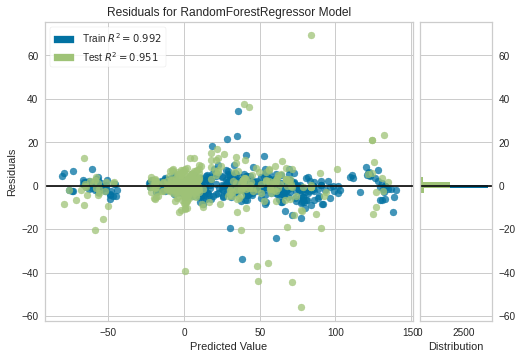

In [30]:
plot_model(rf, plot='residuals')

## Save transformation pipeline and model

In [31]:
save_model (rf, model_name= '/content/gdrive/My Drive/Machine Learning/Final project/With Pycaret/finalized_rf_model')

Transformation Pipeline and Model Succesfully Saved
